## A Small Country on a Global Stage

Every four years, the Winter Olympics turn into this oddly emotional global ritual: flags, anthems, and a few minutes where whole countries feel like they’re holding their breath at the same time.  

Armenia is not a country most people expect to hear during the Winter Games. But I always look for it — partly out of pride, partly out of curiosity, and partly because I want to know what “showing up” looks like for a small nation on one of the biggest stages in the world.


### What I wanted to know

For this Dataset of the Week, I focused on Armenian Winter Olympians and asked:

- **When did Armenia start competing as Armenia** (not as part of the Soviet Union)?
- **Which disciplines** do Armenian athletes show up in most?
- **How close have we come** — best finishes, near misses, any medals?
- And one question that felt personal: **Where are these athletes from?** Mostly the capital city, Yerevan? Elsewhere in Armenia? Foreign-born?

This story isn't about measuring my country's wins through medal count: I wanted to see what the data says about *visibility*, *persistence*, and national pride for my homeland!


![](img/ARM.png){width=500}

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
medals = pd.read_csv('data/winter_olympics_medals.csv')
bios = pd.read_csv('data/bios.csv')


#### To understand Armenia’s presence in the Winter Olympics, I draw from two datasets:  
One that captures athlete biographies and national representation, and another that records Olympic participation and results by year. Together, these datasets allow me to trace not just who Armenian athletes are, but when and how they appear on the Olympic stage.

In [17]:
# Armenia in the Winter Olympics (represented as NOC = ARM)
armenia_medals = medals[medals['noc'] == 'ARM'].copy()

# Clean up types
armenia_medals['year'] = armenia_medals['year'].astype(int)
armenia_medals['place'] = pd.to_numeric(armenia_medals['place'], errors='coerce')

armenia_medals.head()


,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
8017,1994,Winter,Bobsleigh (Bobsleigh),"Two, Men (Olympic)",Joe Almasian,83552,ARM,Ken Topalian,36.0,False,NaN
14283,1998,Winter,Figure Skating (Skating),"Ice Dancing, Mixed (Olympic)",Samvel Gyozalyan,86036,ARM,Kseniya Smetanenko,24.0,False,NaN
28565,1994,Winter,Bobsleigh (Bobsleigh),"Two, Men (Olympic)",Ken Topalian,98326,ARM,Joe Almasian,36.0,False,NaN
31780,1998,Winter,Alpine Skiing (Skiing),"Slalom, Men (Olympic)",Arsen Harutyunyan,99522,ARM,NaN,27.0,False,NaN
31781,2002,Winter,Alpine Skiing (Skiing),"Slalom, Men (Olympic)",Arsen Harutyunyan,99522,ARM,NaN,NaN,False,NaN


In [18]:
first_year = armenia_medals['year'].min()
first_year


np.int64(1994)

### The turning point: 1994

The first year Armenia appears in the Winter Olympics as its own delegation is **1994**.

That year hits like a historical marker, not just a sports fact. Armenian athletes existed before then, of course — but **1994 is when “Armenia” becomes visible** in the records under its own name. Even though Armenia has history spanning near 8,000 years old, it received its first independence from the Ottoman Empire in 1918. That independence was shortlived, as the nation became part of the USSR in 1920, not having its second independence until 1991. Armenian athletes living in the Soviet Union competed under the USSR Olympic team until Armenia's first independent athletes competed in 1994. 


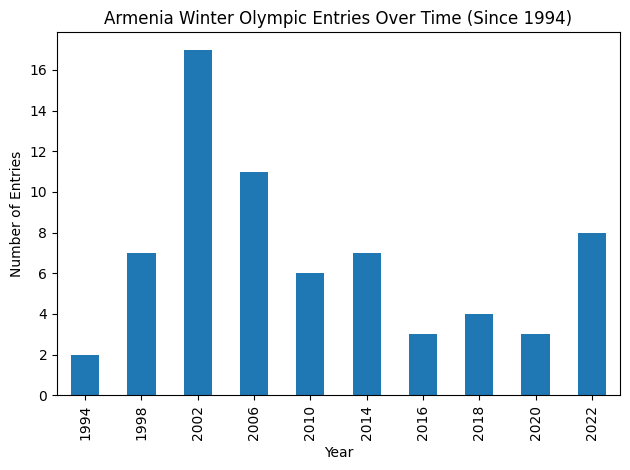

In [19]:
entries_by_year = armenia_medals.groupby('year').size().sort_index()

entries_by_year.plot(kind='bar')
plt.title('Armenia Winter Olympic Entries Over Time (Since 1994)')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.tight_layout()
plt.show()


The numbers are small — but what stands out to me is the consistency.  
For a country with limited winter-sport infrastructure and funding, *continued participation itself* becomes part of the story.


In [28]:
# Spotlight: first Armenian Winter Olympians
armenia_medals[['athlete_id']].merge(
    bios,
    on='athlete_id',
    how='left'
).loc[
    lambda df: df['name'].str.contains('Almasian|Topalian', case=False, na=False),
    ['name', 'born_city', 'born_country']
]

,name,born_city,born_country
0,Joe Almasian,Framingham,USA
2,Ken Topalian,Pawtucket,USA


## A Personal Connection beyond the Red, Blue, and Orange...
Before Armenia’s Winter Olympic participation becomes a set of bars and timelines, it’s worth pausing on the individuals who made that history possible.

Teammates Joe Almasian and Ken Topalian were the first Armenian to compete in the Winter Olympics. What makes this moment especially meaningful is that Joe and Ken were not born in Armenia, but in Framingham, Massachusetts. They represent a strong connection to homeland from the Armenian diaspora. 

Armenia’s earliest Winter Olympians were not only pioneers on the ice, but also reminders that Armenian identity has long existed beyond the country’s borders. For me, this history feels especially close to home because Joe Almasian is the father of a close friend of mine! Seeing his name in the data transforms these records from abstract entries into lived history!

Only after figures like Almasian and Topalian does Armenia’s broader Olympic story begin to take shape.

### Almasian and Topalian were a bobsledding duo for the books, but what other events have Armenian Olympians participated in? Let's find out:

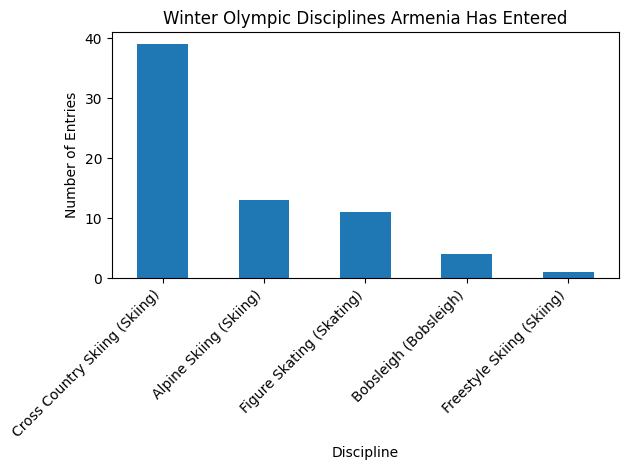

In [30]:
discipline_counts = armenia_medals['discipline'].value_counts()

discipline_counts.plot(kind='bar')
plt.title('Winter Olympic Disciplines Armenia Has Entered')
plt.xlabel('Discipline')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This is where you can see Armenia’s Winter Olympics “shape.” Some disciplines show up again and again — not because Armenia is boxed in, but because winter sports are expensive, specialized, and unequal.  

The Olympics are global, but the *path to qualifying* is not evenly distributed.


In [31]:
# Armenia's best placements (lower place = better finish)
armenia_best = armenia_medals.sort_values('place').head(10)[['year','discipline','event','place','tied','medal']]
armenia_best


,year,discipline,event,place,tied,medal
62566,2022,Figure Skating (Skating),"Ice Dancing, Mixed (Olympic)",18.0,False,NaN
62567,2022,Figure Skating (Skating),"Ice Dancing, Mixed (Olympic)",18.0,False,NaN
34202,1998,Figure Skating (Skating),"Pairs, Mixed (Olympic)",19.0,False,NaN
32603,1998,Freestyle Skiing (Skiing),"Moguls, Men (Olympic)",19.0,False,NaN
34204,1998,Figure Skating (Skating),"Pairs, Mixed (Olympic)",19.0,False,NaN
43435,2006,Figure Skating (Skating),"Ice Dancing, Mixed (Olympic)",20.0,False,NaN
43414,2006,Figure Skating (Skating),"Ice Dancing, Mixed (Olympic)",20.0,False,NaN
34203,2002,Figure Skating (Skating),"Pairs, Mixed (Olympic)",20.0,False,NaN
36901,2002,Figure Skating (Skating),"Pairs, Mixed (Olympic)",20.0,False,NaN
41910,2006,Cross Country Skiing (Skiing),"Team Sprint, Men (Olympic)",23.0,False,NaN


### How close have we come?

Medals aren’t the only way to measure a country’s Olympic story — but they *do* shape how the world remembers participation. So I wanted to look at Armenia’s best finishes and closest calls.

Even without a podium, these top placements show moments where Armenia wasn’t just “present,” it was genuinely competitive.


In [32]:
armenia_medals['medal'].fillna('No medal').value_counts()


medal
No medal    68
Name: count, dtype: int64

The blunt truth: **no Winter Olympic medals (yet)**.

And honestly, that’s exactly why Armenia’s presence still feels meaningful to me. For smaller nations, “success” often looks like: qualifying, finishing, returning, building a program, and slowly widening what’s possible.


## Where are Armenian Winter Olympians born?

This is the part I was most curious about. When we picture “Armenian athletes,” we might assume a straight line: born in Armenia (likely Yerevan), trained in Armenia, competed for Armenia.

But biographies can reveal something more complicated — including diaspora, migration, and training pathways that stretch far beyond the country’s borders.


In [33]:
# Athletes who represented Armenia (from bios)
armenia_bios = bios[bios['NOC'] == 'Armenia'].copy()
armenia_bios[['name','born_city','born_country']].head()


,name,born_city,born_country
603,Sargis Sargsyan,Yerevan,ARM
4997,Artur Gevorgyan,Yerevan,ARM
4998,Nshan Munchyan,Yerevan,ARM
4999,Lernik Papyan,Vanadzor,ARM
14380,Arsen Ghazaryan,Ararat,ARM


In [34]:
# Normalize birth city text (helps group 'Yerevan' vs variants)
armenia_bios['born_city_clean'] = (
    armenia_bios['born_city']
    .fillna('Unknown')
    .str.strip()
    .str.lower()
)

armenia_bios['born_city_clean'] = armenia_bios['born_city_clean'].replace({
    'erevan': 'yerevan',
})

armenia_bios['born_city_clean'].value_counts().head(15)


born_city_clean
yerevan            50
gyumri             31
vanadzor            9
vagharshapat        7
tsakhkadzor         5
moskva (moscow)     3
ashotsk             3
ararat              2
artashat            1
bambakashat         1
parakar             1
pshatavan           1
framingham          1
vedi                1
tazagyukh           1
Name: count, dtype: int64

In [35]:
def birthplace_bucket(row):
    city = row['born_city_clean']
    country = row['born_country']

    if city == 'yerevan':
        return 'Born in Yerevan'
    if pd.isna(country):
        return 'Unknown birthplace'
    if country == 'ARM':
        return 'Born in Armenia (outside Yerevan)'
    return 'Born outside Armenia'

armenia_bios['birth_bucket'] = armenia_bios.apply(birthplace_bucket, axis=1)
armenia_bios['birth_bucket'].value_counts()


birth_bucket
Born in Armenia (outside Yerevan)    77
Born in Yerevan                      50
Born outside Armenia                 26
Name: count, dtype: int64

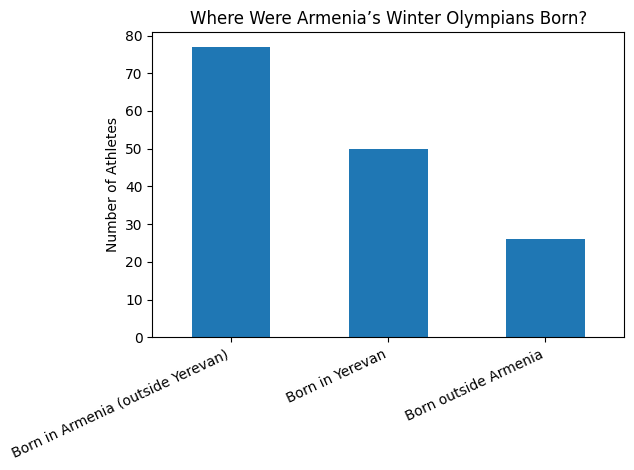

In [36]:
bucket_counts = armenia_bios['birth_bucket'].value_counts()

bucket_counts.plot(kind='bar')
plt.title('Where Were Armenia’s Winter Olympians Born?')
plt.xlabel('')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()


This breakdown is one of my favorite parts of the whole dataset. Even when athletes compete under the Armenian flag, their life paths can be geographically wide — and that feels like an honest reflection of Armenian history more broadly.

Depending on the split you see here, you can read it as:
- the importance of **Yerevan** as both the center of the nation (capital city) and sports life, and/or  
- a sign of **diaspora + mobility**, where representing Armenia doesn’t always start with being born inside Armenia.


In [37]:
# Optional: which countries show up most among foreign-born athletes?
foreign = armenia_bios[
    armenia_bios['born_country'].notna() & (armenia_bios['born_country'] != 'ARM')
]

foreign['born_country'].value_counts().head(10)


born_country
RUS    12
USA     7
UKR     3
CAN     2
FRA     1
GEO     1
Name: count, dtype: int64

## Conclusion

By the time Armenia appears in the Winter Olympics in 1994, the story is already much older than the data suggests. Armenian athletes existed long before that year, but independence transformed their participation into something visible, named, and collective. What changes in 1994 is not athletic ability, but recognition.

Looking across the data, Armenia’s Winter Olympic presence is modest: a small number of athletes, a narrow range of disciplines, and no medals to show for it. Yet the numbers also reveal consistency, dedication, and perseverance. Armenia keeps returning. Every four years, despite limited resources and little expectation of podium finishes, Armenian athletes continue to show up under their own flag, raising awareness for our nation with each event.

The birthplace data complicates this picture further. Some athletes are born in Yerevan, others elsewhere in Armenia, and many outside the country entirely. Figures like Joe Almasian and Ken Topalian remind us that Armenia’s Olympic story is not confined by borders. It is shaped by diaspora, movement, and the reality that national identity does not always align neatly with geography. Armenia’s earliest Winter Olympians were not only pioneers in sport, but symbols of a global Armenian presence asserting itself on an international stage.

Seen this way, Armenia’s Winter Olympic history is not defined by what is missing from the medal table. It is defined by persistence, visibility, and pride. The data tells a story not of dominance, but of endurance of a small nation, and a far-reaching people, continuing to claim their place in the world’s largest sporting event.